<a href="https://colab.research.google.com/github/Running-Machine-ML23-2/Extra_credit/blob/main/Extra_credit_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 압축 해제**

In [ ]:
from zipfile import ZipFile
import os

# 압축 해제할 파일 경로
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/ts.zip'

# 압축을 해제할 디렉토리 경로
extracted_path = '/content/drive/MyDrive/Colab Notebooks'


# Zip 파일 열기
with ZipFile(zip_file_path, 'r') as zip_ref:
    # 모든 파일을 지정된 디렉토리로 추출
    zip_ref.extractall(extracted_path)

print(f'{zip_file_path} 파일이 성공적으로 압축 해제되었습니다.')


KeyboardInterrupt: ignored



# **데이터 추출**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import random
# 파일 경로 설정
folder_path = "/content/drive/MyDrive/ts"
output_path = "/content/drive/MyDrive/Colab Notebooks/extra_data_split_1.pkl"

# 데이터를 저장할 리스트
data_list = {'X1': [], 'X2': [], 'y': []}

# 파일 목록 가져오기
file_list = os.listdir(folder_path)
file_list.sort(reverse=True)


In [ ]:

# 파일을 읽어서 데이터 처리
for idx, file_name in enumerate(file_list, start=1):
    if file_name.endswith(".cell"):
        file_path = os.path.join(folder_path, file_name)

        # # 파일 크기가 0바이트인 경우 건너뛰기
        # if os.path.getsize(file_path) == 0 or "join" in file_name or "split_1"  :
        #     continue
        if "split_1" in file_name:
          with open(file_path, "r") as file:
              print(f"Working on file {idx}/{len(file_list)} - {file_name}")
              lines = file.readlines()
              x1_values = []
              x2_values = []
              for line in lines:
                  parts = line.strip().split('\t')
                  x1_values.append(float(parts[0]))
                  x2_values.append(float(parts[2]))

              y = int(file_name.split('-')[0])
              # 데이터를 딕셔너리로 저장
              data_list['X1'].append(x1_values)
              data_list['X2'].append(x2_values)
              data_list['y'].append(y)

df = pd.DataFrame(data_list)

# DataFrame을 pkl 파일로 저장
df.to_pickle(output_path)

print("데이터 전처리 및 저장이 완료되었습니다.")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Working on file 68279/98188 - 34-97_split_1.cell
Working on file 68285/98188 - 34-96_split_1.cell
Working on file 68291/98188 - 34-95_split_1.cell
Working on file 68297/98188 - 34-94_split_1.cell
Working on file 68303/98188 - 34-93_split_1.cell
Working on file 68309/98188 - 34-92_split_1.cell
Working on file 68315/98188 - 34-91_split_1.cell
Working on file 68319/98188 - 34-90_split_1.cell
Working on file 68324/98188 - 34-8_split_1.cell
Working on file 68329/98188 - 34-89_split_1.cell
Working on file 68334/98188 - 34-88_split_1.cell
Working on file 68339/98188 - 34-87_split_1.cell
Working on file 68345/98188 - 34-86_split_1.cell
Working on file 68350/98188 - 34-85_split_1.cell
Working on file 68355/98188 - 34-84_split_1.cell
Working on file 68361/98188 - 34-83_split_1.cell
Working on file 68366/98188 - 34-82_split_1.cell
Working on file 68372/98188 - 34-81_split_1.cell
Working on file 68378/98188 - 34-80_split_1.cell
Working on file 68384/98188 - 34-7





































# **데이터 학습 & 결과**

In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data from the pickle file
file_path = "/content/drive/MyDrive/Colab Notebooks/extra_data_split_0.pkl"
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Separate features (X1, X2) and target variable (y)
X1_mon = data['X1']
X2_mon= (data['X2'])
y = (data['y'])
X1_mon = [[round(float(value), 2) for value in sequence] for sequence in X1_mon]
X2_mon = [[round(float(value), 2) for value in sequence] for sequence in X2_mon]
y = y.tolist()

print(f'Total samples: {len(X1_mon)}')
print(f'Total samples: {len(y)}')

Total samples: 16363
Total samples: 16363


In [ ]:
outgoing_packets_fraction = []  # Array to store the outgoing packets fraction for unmonitored data
std_outgoing_packet_ordering = []  # Array to store the standard deviation of outgoing packet ordering for unmonitored data

for i in range(len(X1_mon)):
    outgoing_packets = 0
    packet_ordering = []
    total_packets = len(X1_mon[i])  # Get the total number of packets in X1_mon[i]

    if total_packets > 0:
        for j in range(len(X1_mon[i])):
            if X2_mon[i][j] > 0:
                outgoing_packets += 1
                packet_ordering.append(X1_mon[i][j])

        outgoing_packets_fraction.append(outgoing_packets / total_packets)

        if len(packet_ordering) > 1:  # Check if there is more than one element to calculate std
            std_outgoing_packet_ordering.append(np.std(packet_ordering))
        else:
            std_outgoing_packet_ordering.append(0)  # If only one element, set std_outgoing_packet_ordering to 0
    else:
        outgoing_packets_fraction.append(0)  # If total_packets is 0, set outgoing_packets_fraction to 0
        std_outgoing_packet_ordering.append(0)  # If total_packets is 0, set std_outgoing_packet_ordering to 0


In [ ]:
MAX_SEQUENCE_LENGTH = 100  # 시퀀스의 최대 길이

def pad_sequence(seq, max_length):
    if len(seq) < max_length:
        seq += [0] * (max_length - len(seq))  # 패딩
    else:
        seq = seq[:max_length]  # 잘라냄
    return seq

def compute_bursts(sequence, max_length):
    bursts = []

    if len(sequence) == 0:
        return [0] * max_length  # If the sequence is empty, return a list of zeros

    current_burst = sequence[0]

    for size in sequence[1:]:
        if np.sign(size) == np.sign(current_burst):
            current_burst += size
        else:
            bursts.append(current_burst)
            current_burst = size
    bursts.append(current_burst)

    # Pad the bursts to the maximum sequence length
    bursts = pad_sequence(bursts, max_length)

    return bursts

X2_all = X2_mon
X1_all = X1_mon

X2_all = [pad_sequence(x, MAX_SEQUENCE_LENGTH) for x in X2_all]
X1_all = [pad_sequence(x, MAX_SEQUENCE_LENGTH) for x in X1_all]

X_mon_bursts = [compute_bursts(x, MAX_SEQUENCE_LENGTH) for x in X2_mon]

X_mon_cumsum = [pad_sequence(np.cumsum(x).tolist(), MAX_SEQUENCE_LENGTH) for x in X2_mon]

num_packets = [sum(1 for size in instance_sizes if size < 0) for instance_sizes in X2_mon]
X_CAT1 = num_packets
X_CAT2 = outgoing_packets_fraction
X_CAT4 = std_outgoing_packet_ordering

X_CAT1 = np.array(X_CAT1).reshape(-1, 1)
X_CAT2 = np.array(X_CAT2).reshape(-1, 1)
X_CAT4 = np.array(X_CAT4).reshape(-1, 1)


Progress: 100%|██████████| 7/7 [46:25<00:00, 397.96s/it]


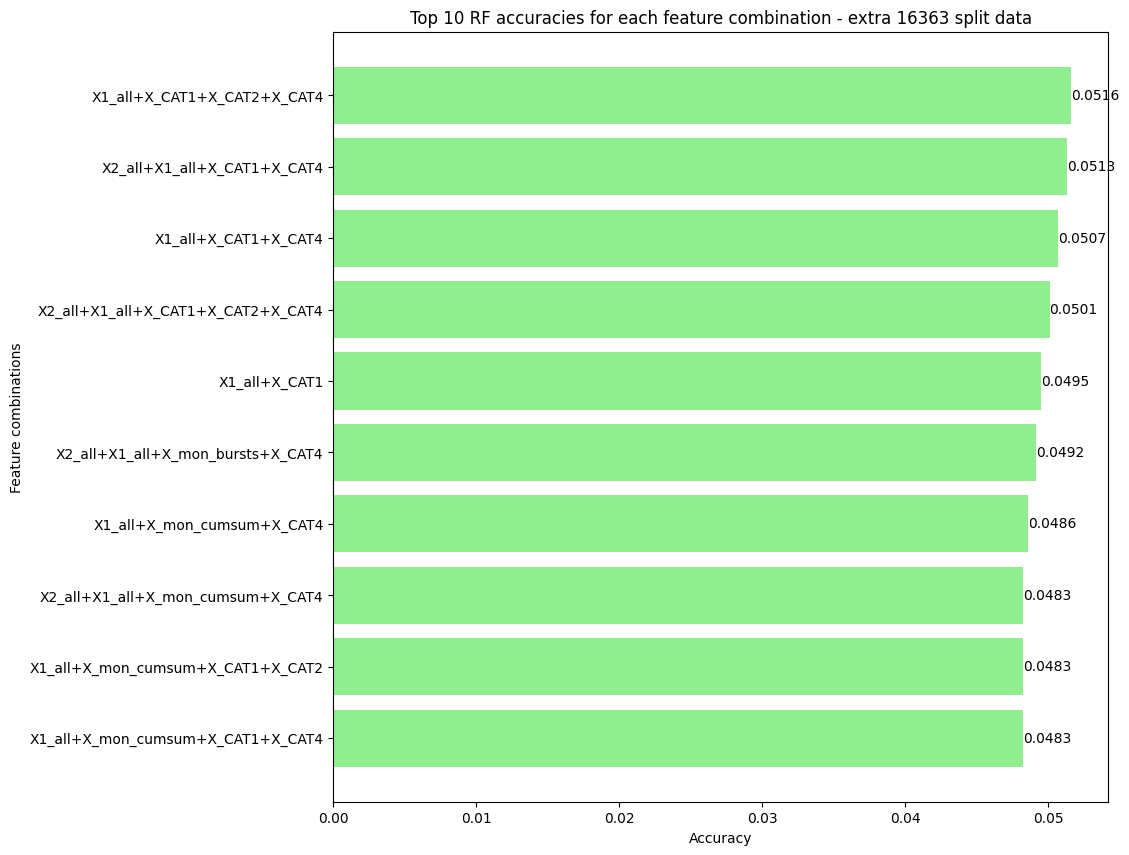

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm  # tqdm 추가

# 결과를 저장할 딕셔너리
results_rf = {}

# 가능한 모든 조합에 대해
for r in tqdm(range(1, len(features) + 1), desc='Progress'):  # tqdm을 사용하여 진행 상황 표시
    for subset_indices in combinations(range(len(features)), r):  # 인덱스로 조합 생성
        subset = [features[i] for i in subset_indices]  # 선택된 피처 리스트
        subset_names = [feature_names[i] for i in subset_indices]  # 선택된 피처 이름 리스트

        # 피처를 합칩니다
        X = np.concatenate([np.array(feature) for feature in subset], axis=1)
        # 훈련 데이터와 테스트 데이터 나누기
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # 모델 초기화 (Random Forest로 변경)
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest 모델 초기화

        # 모델 학습
        rf_classifier.fit(X_train, y_train)

        # 예측
        y_pred = rf_classifier.predict(X_test)

        # 성능 평가
        accuracy = accuracy_score(y_test, y_pred)

        # 결과 저장
        results_rf[tuple(subset_names)] = accuracy  # 키를 튜플로 변환

# 결과를 정확도에 따라 내림차순으로 정렬
sorted_results_rf = sorted(results_rf.items(), key=lambda x: x[1], reverse=True)

# 상위 10개만 선택
sorted_results_rf = sorted_results_rf[:10]

# 피처 조합과 정확도를 분리
feature_combinations_rf, accuracies_rf = zip(*sorted_results_rf)

# 피처 조합을 문자열로 변환
feature_combinations_rf = ['+'.join(features) for features in feature_combinations_rf]

# 막대 그래프 생성
plt.figure(figsize=(10, 10))
bars_rf = plt.barh(feature_combinations_rf, accuracies_rf, color='lightgreen')
plt.xlabel('Accuracy')
plt.ylabel('Feature combinations')
plt.title('Top 10 RF accuracies for each feature combination - extra 16363 split data')

# 결과값(result)을 막대 옆에 출력
for bar, result in zip(bars_rf, sorted_results_rf):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{result[1]:.4f}', va='center', ha='left')

plt.gca().invert_yaxis()  # y축을 내림차순으로 정렬
plt.show()


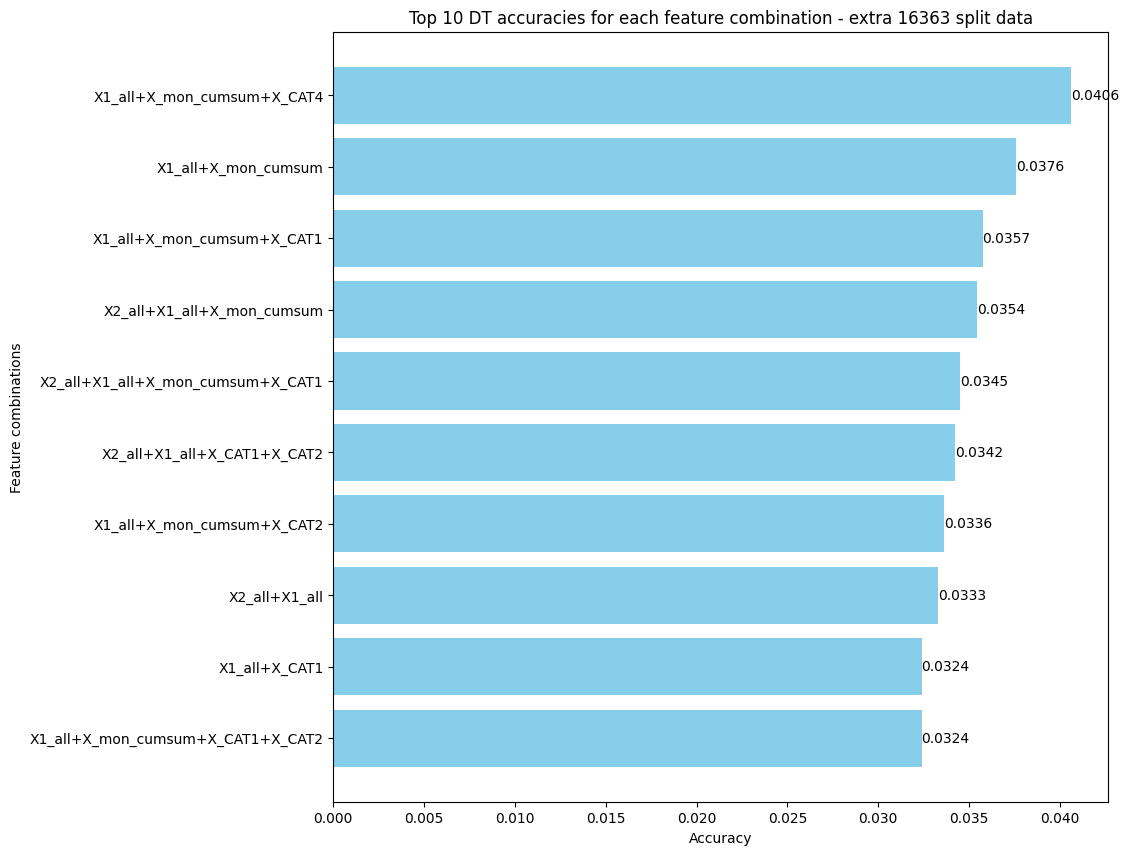

In [ ]:
import matplotlib.pyplot as plt

# 결과를 정확도에 따라 내림차순으로 정렬
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# 상위 10개만 선택
sorted_results = sorted_results[:10]

# 피처 조합과 정확도를 분리
feature_combinations, accuracies = zip(*sorted_results)

# 피처 조합을 문자열로 변환
feature_combinations = ['+'.join(features) for features in feature_combinations]

# 막대 그래프 생성
plt.figure(figsize=(10, 10))
bars = plt.barh(feature_combinations, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Feature combinations')
plt.title('Top 10 DT accuracies for each feature combination - extra 16363 split data')

# 결과값(result)을 막대 옆에 출력
for bar, result in zip(bars, sorted_results):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{result[1]:.4f}', va='center', ha='left')

plt.gca().invert_yaxis()  # y축을 내림차순으로 정렬
plt.show()
